In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [2]:
data = pd.read_csv('menu.csv')

In [3]:
print(data['Serving Size'])

0       4.8 oz (136 g)
1       4.8 oz (135 g)
2       3.9 oz (111 g)
3       5.7 oz (161 g)
4       5.7 oz (161 g)
            ...       
255    10.1 oz (285 g)
256    13.4 oz (381 g)
257     6.7 oz (190 g)
258    14.2 oz (403 g)
259     7.1 oz (202 g)
Name: Serving Size, Length: 260, dtype: object


Nie powinny wchodzić w skład wektora cech:
* category (z nimi będziemy porównywać)
* item (nazwy nie da się interpretować)
* serving size (różne jednostki - gramatura, objętość)

In [4]:
data.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [5]:
data['Serving Size'].describe()

count              260
unique             107
top       16 fl oz cup
freq                45
Name: Serving Size, dtype: object

In [6]:
data = data.drop(columns=['Category', 'Item', 'Serving Size'])

In [7]:
data_np = data.to_numpy()

In [8]:
print(data_np)

[[300. 120.  13. ...   0.  25.  15.]
 [250.  70.   8. ...   0.  25.   8.]
 [370. 200.  23. ...   0.  25.  10.]
 ...
 [340. 100.  11. ...   0.  25.   6.]
 [810. 290.  32. ...   0.  60.   6.]
 [410. 150.  16. ...   0.  30.   4.]]


In [9]:
corr = np.corrcoef(data_np, rowvar=False)

<AxesSubplot:>

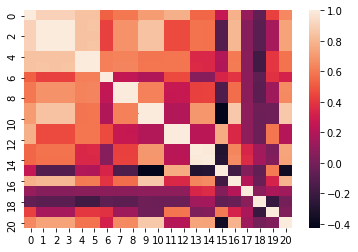

In [10]:
sb.heatmap(corr)

Wycentrowanie nie jest konieczne, jednak ułatwi skalowanie.

In [11]:
data['Calories'].describe()

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

In [12]:
data['Sugars'].describe()

count    260.000000
mean      29.423077
std       28.679797
min        0.000000
25%        5.750000
50%       17.500000
75%       48.000000
max      128.000000
Name: Sugars, dtype: float64

In [13]:
data['Protein'].describe()

count    260.000000
mean      13.338462
std       11.426146
min        0.000000
25%        4.000000
50%       12.000000
75%       19.000000
max       87.000000
Name: Protein, dtype: float64

In [14]:
data['Trans Fat'].describe()

count    260.000000
mean       0.203846
std        0.429133
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.500000
Name: Trans Fat, dtype: float64

In [15]:
print(data.shape[1])


21


In [16]:
data_reduced = data.drop(columns=['Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber'])

In [17]:
data_reduced_np = data_reduced.to_numpy()

<AxesSubplot:>

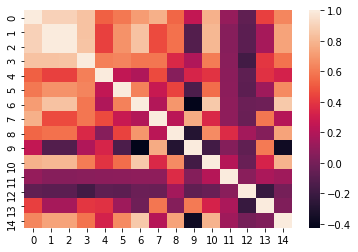

In [18]:
sb.heatmap(np.corrcoef(data_reduced_np, rowvar=False))


In [19]:
np.corrcoef(data['Total Fat'], data['Calories from Fat'])

array([[1.       , 0.9996635],
       [0.9996635, 1.       ]])

In [20]:
data_reduced.describe()

,Calories,Calories from Fat,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Trans Fat,Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,21.815385,29.965385,0.203846,18.392308,20.676923,15.780769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,21.885199,26.639209,0.429133,29.091653,24.034954,9.419544,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,3.750000,4.750000,0.000000,2.000000,4.750000,10.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,17.000000,24.000000,0.000000,11.000000,8.000000,15.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,35.000000,48.000000,0.000000,21.250000,36.250000,20.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,182.000000,102.000000,2.500000,192.000000,150.000000,47.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [21]:
np.corrcoef(data_reduced['Calories'], data_reduced['Calories from Fat'])

array([[1.       , 0.9045878],
       [0.9045878, 1.       ]])

In [22]:
final_data = data_reduced.drop(columns=['Calories from Fat'])

<AxesSubplot:>

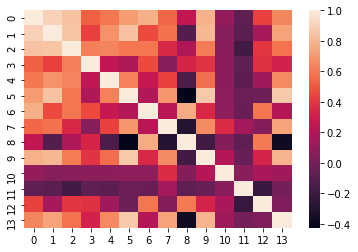

In [23]:
sb.heatmap(np.corrcoef(final_data.to_numpy(), rowvar=False))

In [114]:
# for column in final_data:
#     plt.bar(range(final_data.shape[0]), final_data[column])
#     plt.xlabel(column)
#     plt.save()

In [25]:
final_data_np = final_data.to_numpy()

In [26]:
def score_basic_kmeans(data, func, verbose=False, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, init=func, verbose=verbose)
    kmeans.fit(data)
    return davies_bouldin_score(data, kmeans.labels_)

In [27]:
score_basic_kmeans(final_data_np, "k-means++")

0.6257642173514324

In [28]:
score_basic_kmeans(final_data_np, "random")

0.60948362454602

In [29]:
def get_random(X, n_clusters, random_state):
    X = np.array(X)
    res = [[random.uniform(min(list(X[:, i])), max(list(X[:, i]))) for j in range(n_clusters)] for i in range(X.shape[1])]
    return np.stack(res, axis=1)

In [30]:
score_basic_kmeans(final_data_np, get_random)

0.6232743504859614

Dane które mają % daily value przeskalować przez 100, Calories, Sugar, Protein - znaleźć dane o dziennym spożyciu i podzielić xD

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data_np)

In [32]:
score_basic_kmeans(scaled_data, "random")

1.1101246319341047

In [33]:
NUM_ATTEMPTS = 5
NUM_CLUSTERS = 5
NUM_ITER = 50

def assess_method(data_sample, method):
    scores = []

    for sample in range(NUM_ATTEMPTS):
        print('\nCentroid attempt: ', sample)
        km = KMeans(n_clusters=NUM_CLUSTERS, init=method, max_iter=1, n_init=1)#, verbose=1)
        km.fit(data_sample)
        scores.append([])
        cents = km.cluster_centers_

        for iter in range(NUM_ITER):
            km = KMeans(n_clusters=NUM_CLUSTERS, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            scores[sample].append(davies_bouldin_score(data_sample, km.labels_))
            cents = km.cluster_centers_
    return np.array(scores)

In [34]:
assessment = assess_method(final_data, "random")
print(assessment.shape)


Centroid attempt:  0

Centroid attempt:  1

Centroid attempt:  2

Centroid attempt:  3

Centroid attempt:  4
(5, 50)


In [111]:
def plot_assessment(assessment, xlabel="iteration", ylabel="davies_bouldin_score"):
    assessment = assessment.T
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.bar(range(assessment.shape[0]), means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    # plt.xticks(range(assessment.shape[1]))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f'method_assessment_{xlabel}')

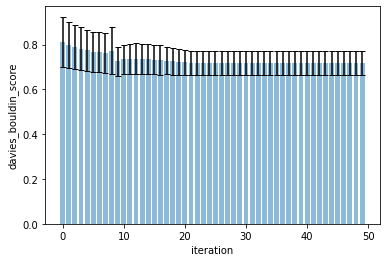

In [112]:
plot_assessment(assessment)

In [37]:
best_method = "random"
def assess_k(data, ns_clusters, repetitions):
    k_scores = []
    for k in range(len(ns_clusters)):
        k_scores.append([])
        for i in range(repetitions):
            kmeans = KMeans(n_clusters=ns_clusters[k], init=best_method)
            kmeans.fit(data)
            k_scores[k].append(davies_bouldin_score(data, kmeans.labels_))
        k_scores[k] = np.array(k_scores[k])
    return np.array(k_scores)

In [38]:
k_range = range(3, 25)
k_assessment = assess_k(final_data, k_range, 5)
print(k_assessment)

[[0.72295101 0.71913709 0.71913709 0.71913709 0.7239214 ]
 [0.73675683 0.73959068 0.73959068 0.73959068 0.73959068]
 [0.74158341 0.74158341 0.74158341 0.74158341 0.60948362]
 [0.83304884 0.68725074 0.83083882 0.74581917 0.68667744]
 [0.77155062 0.84882392 0.7772173  0.80362419 0.7722459 ]
 [0.77637794 0.81448823 0.81022091 0.68088585 0.90417929]
 [0.89419388 0.88991669 0.88452951 0.89775247 0.87342344]
 [1.07692389 0.85156887 0.92950805 0.84614949 0.99860952]
 [0.9070584  0.86729665 0.93814289 0.91124773 0.91924068]
 [0.84907877 0.86926415 0.90188883 0.82778687 0.86740361]
 [0.87098788 0.81867234 0.89188561 0.86580279 1.03171142]
 [0.83081289 0.87192983 1.01275263 0.97617922 0.88523248]
 [0.95143592 0.95442246 1.03336107 0.89237388 0.95147171]
 [0.88766547 0.91606621 0.92731488 1.02149167 0.9287104 ]
 [0.90904996 0.93355706 1.01523545 0.88939027 0.90940153]
 [0.86846011 0.89809229 0.91188866 0.88121127 0.90992972]
 [0.92560365 0.85817729 1.00130734 0.87902992 1.08229871]
 [0.85469632 0

In [113]:
def plot_k_assessment(assessment, k_range):
    stds = [np.std(res) for res in assessment]
    means = [np.mean(res) for res in assessment]
    plt.bar(k_range, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=3)
    plt.xticks(k_range)
    plt.xlabel("k")
    plt.ylabel("davies_bouldin_score")
    plt.savefig(f'k_assessment_{k_range}')

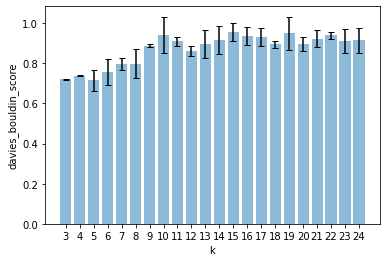

In [110]:
plot_k_assessment(k_assessment, k_range)

In [41]:
def get_res(data, method, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init=method)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

In [89]:
BEST_K = 5

In [88]:
data = pd.read_csv('menu.csv')

distinct_categories = list(set(data['Category']))
COLOR_NUM = max(BEST_K, len(distinct_categories))
colors = []

for i in range(COLOR_NUM):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF))

In [93]:
labels, centers = get_res(final_data_np, "random", BEST_K)
label_colors = [colors[label] for label in labels]

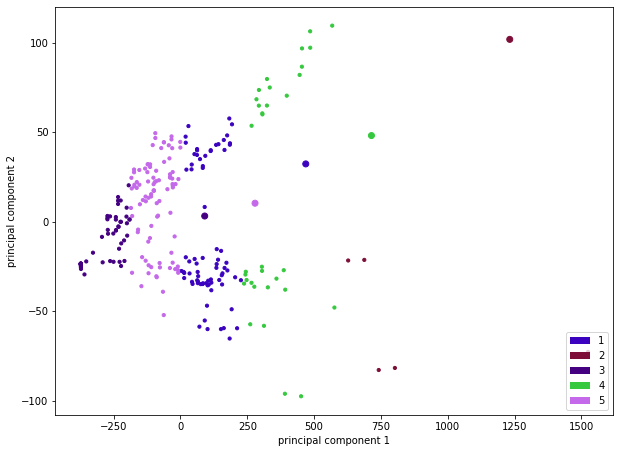

In [117]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(final_data_np)
transformed_centers = pca.fit_transform(centers)
fig=plt.figure(figsize=(10, 7.5))
plt.scatter(transformed_data[:,0], transformed_data[:, 1], c=label_colors, s=10)
plt.scatter(centers[:,0], centers[:, 1], c=colors[:BEST_K])

recs = []
for i in range(BEST_K):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))

plt.legend(recs, range(1, BEST_K + 1), loc='lower right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.savefig('cluters_pca')

In [91]:
category_colors = [colors[distinct_categories.index(category)] for category in data['Category']]

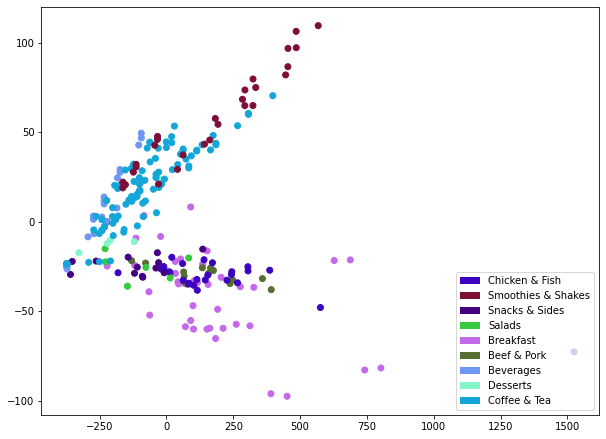

In [116]:
fig=plt.figure(figsize=(10, 7.5))
plt.scatter(transformed_data[:,0], transformed_data[:, 1], c=category_colors)
recs = []
for i in range(len(distinct_categories)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs, distinct_categories, loc='lower right')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.savefig('categories')

#TODO: colors on graph, data preparation